In [330]:
def get_model_results(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = [i for i in range(1,len(acc)+1)]
    print(('acc = %0.2f, loss = %0.2f ')%(max(acc),min(loss)))
    print(('val_acc = %0.2f, val_loss = %0.2f ')%(max(val_acc),min(val_loss)))
    
    plt.figure()
    plt.plot(epochs,acc,'bo',label = 'Training acc')
    plt.plot(epochs,val_acc,'b',label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs,loss,'bo',label = 'Training loss')
    plt.plot(epochs,val_loss,'b',label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Preprocessing data

### Loading  twitter data

In [54]:
from pandas import read_csv, Series

In [2]:
df_twits = read_csv('../datasets/sentimenttwits/training.1600000.processed.noemoticon.csv',
                    names = ['sentiment','text'],
                    usecols = [0,5],
                    encoding = 'latin-1')

In [3]:
df_twits.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [297]:
df_twits.drop_duplicates(inplace=True)

In [55]:
def my_tokenizer(s0):
    import re
    from nltk.tokenize import TweetTokenizer

    tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    s0 = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",s0)
    return tknzr.tokenize(s0)

In [60]:
## text examples:
s0 = df_twits.loc[0].text
print(my_tokenizer(s0))

s0 = 'I am at Starbucks http://4sh.com/samqUI (7419 3rd ave, at 75th, Brooklyn)'
print(my_tokenizer(s0))

s0 = '@peter I really love that shirt at #Macy. http://bit.ly//WjdiW#'
print(my_tokenizer(s0))

s0 = df_twits.loc[0].text
print(my_tokenizer(s0))
print(' '.join(my_tokenizer(s0)))

['awww', 'that', 's', 'a', 'bummer', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', 'd']
['i', 'am', 'at', 'starbucks', '7419', '3rd', 'ave', 'at', '75th', 'brooklyn']
['i', 'really', 'love', 'that', 'shirt', 'at', 'macy']
['awww', 'that', 's', 'a', 'bummer', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', 'd']
awww that s a bummer you shoulda got david carr of third day to do it d


In [ ]:
'I am at Starbucks http://4sh.com/samqUI (7419 3rd ave, at 75th, Brooklyn)'

In [39]:
list_of_lengths = [ len(my_tokenizer(s0)) for s0 in df_twits.text.tolist() ]

<IPython.core.display.Javascript object>


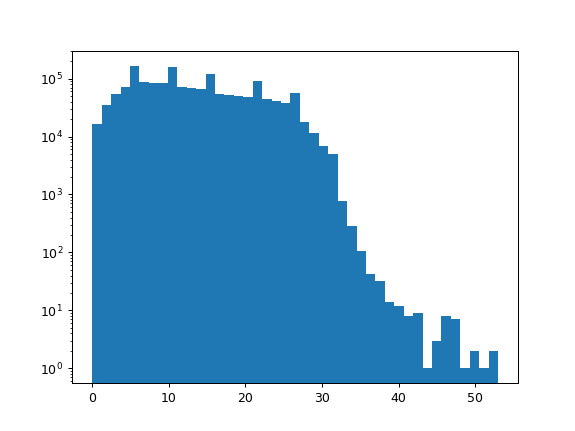

(array([1.66260e+04, 3.50260e+04, 5.38100e+04, 7.27450e+04, 1.65139e+05,
        8.59030e+04, 8.52790e+04, 8.26140e+04, 1.57386e+05, 7.27740e+04,
        6.90890e+04, 6.51900e+04, 1.19539e+05, 5.48260e+04, 5.21880e+04,
        4.99300e+04, 4.79210e+04, 9.26480e+04, 4.39360e+04, 4.11240e+04,
        3.74500e+04, 5.69360e+04, 1.75170e+04, 1.13110e+04, 6.76500e+03,
        5.02200e+03, 7.67000e+02, 2.90000e+02, 1.06000e+02, 4.30000e+01,
        3.20000e+01, 1.40000e+01, 1.20000e+01, 8.00000e+00, 9.00000e+00,
        1.00000e+00, 3.00000e+00, 8.00000e+00, 7.00000e+00, 1.00000e+00,
        2.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([ 0.        ,  1.23255814,  2.46511628,  3.69767442,  4.93023256,
         6.1627907 ,  7.39534884,  8.62790698,  9.86046512, 11.09302326,
        12.3255814 , 13.55813953, 14.79069767, 16.02325581, 17.25581395,
        18.48837209, 19.72093023, 20.95348837, 22.18604651, 23.41860465,
        24.65116279, 25.88372093, 27.11627907, 28.34883721, 29.58139535,
  

In [46]:
%matplotlib notebook
from matplotlib import pyplot as plt

plt.hist(list_of_lengths,bins=43, log = True)

In [47]:
## Setting text hyperparametters
maxlen = 32
max_words = 10000

In [62]:
## Defined cleaned text
df_twits['text_cleaned'] = df_twits.text.map(lambda s: ' '.join(my_tokenizer(s)))

In [298]:
df_twits.head()

,sentiment,text,text_cleaned
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that s a bummer you shoulda got david car...
1,0,is upset that he can't update his Facebook by ...,is upset that he can t update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am i h...


In [322]:
labels = df_twits.sentiment.map(lambda x: int(x/4)).tolist()
texts = df_twits.text_cleaned.tolist()

In [64]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [300]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [301]:
word_index = tokenizer.word_index

### Embedding

In [294]:
import os
from numpy import asarray,zeros

In [53]:
glove_dir = "/home/omar/Documents/DataScience/TextML/embeddings"

embeddings_index = {}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    try:
        coefs = asarray(values[1:], dtype = 'float32')
    except ValueError:
        print(values[1:])
    embeddings_index[word] = coefs
f.close()
print('Found %d word vectors'%len(embeddings_index))

Found 400000 word vectors


In [303]:
embedding_dim = 100
embedding_matrix = zeros((max_words,embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

### Preparing Training, Validattion and Test Datasets

In [315]:
from numpy import random
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [332]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = asarray(labels)

training_samples = 100000
validation_samples = 10000

In [337]:
#X_train, X_val, Y_train, Y_val = train_test_split(data,labels,
#                                                  test_size=validation_samples,
#                                                  train_size = training_samples,
#                                                  random_state = 1234,
#                                                  shuffle = True,
#                                                  stratify = labels)

X_train, X_val, Y_train, Y_val = train_test_split(data,labels,
                                                  test_size=0.2,
                                                  train_size = 0.8,
                                                  random_state = 1234,
                                                  shuffle = True,
                                                  stratify = labels)

## Writing Model

In [173]:
from keras import layers
from keras import Input
from keras.models import Model,Sequential
from keras import backend as K

In [313]:
input_twitts = Input(shape = (maxlen,),dtype='int32',name = 'input_twitt')
emb_dense = layers.Embedding(max_words,
                             embedding_dim,
                             input_length=maxlen,
                             trainable = False,
                             weights = [embedding_matrix],
                             mask_zero = True,
                             name = 'embedded')(input_twitts)

emb_dense = layers.TimeDistributed(layers.Dense(32, use_bias=False, name = 'emb_dense'),
                                  name = 'time_distributed')(emb_dense)

layer_gru = layers.GRU(32,
                       dropout = 0.1,
                       recurrent_dropout=0.5,
                       return_sequences=True,
                       use_bias=True,
                       name = 'layer_gru')

emb_dense = layers.Bidirectional(layer_gru, name = 'bidirectional')(emb_dense)

emb_dense = layers.GRU(32,
                       dropout = 0.1,
                       recurrent_dropout=0.5,
                       return_sequences=False,
                       use_bias=True,
                       name = 'layer_gru1')(emb_dense)

emb_dense = layers.Dense(1,activation='relu', use_bias=True, name = 'dense_2')(emb_dense)
model_twitter = Model(input_twitts, emb_dense)

In [314]:
model_twitter.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_twitt (InputLayer)     (None, 32)                0         
_________________________________________________________________
embedded (Embedding)         (None, 32, 100)           1000000   
_________________________________________________________________
time_distributed (TimeDistri (None, 32, 32)            3200      
_________________________________________________________________
bidirectional (Bidirectional (None, 32, 64)            12480     
_________________________________________________________________
layer_gru1 (GRU)             (None, 32)                9312      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,025,025
Trainable params: 25,025
Non-trainable params: 1,000,000
_____________________________________________________________

In [329]:
model_twitter.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = ['acc'])

In [338]:
history_big_model = model_twitter.fit(X_train,
                    Y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data=(X_val,Y_val),
                    verbose=False)

acc = 0.78, loss = 0.48 
val_acc = 0.79, val_loss = 0.45 


<IPython.core.display.Javascript object>


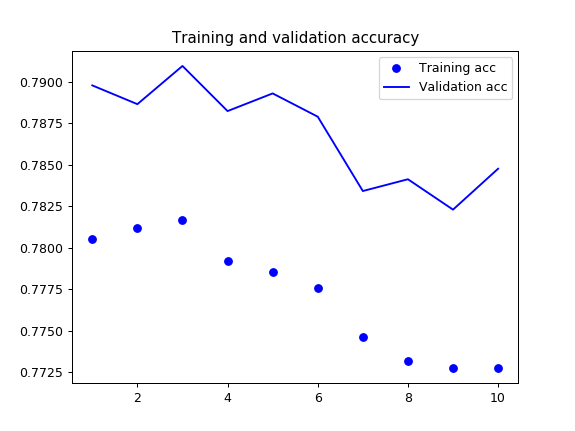

<IPython.core.display.Javascript object>


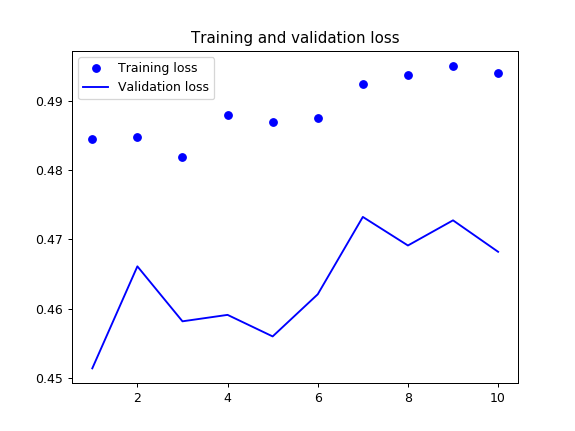

In [339]:
get_model_results(history_big_model)

In [335]:
history = model_twitter.fit(X_train,
                    Y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data=(X_val,Y_val),
                    verbose=False)

acc = 0.78, loss = 0.48 
val_acc = 0.78, val_loss = 0.47 


<IPython.core.display.Javascript object>


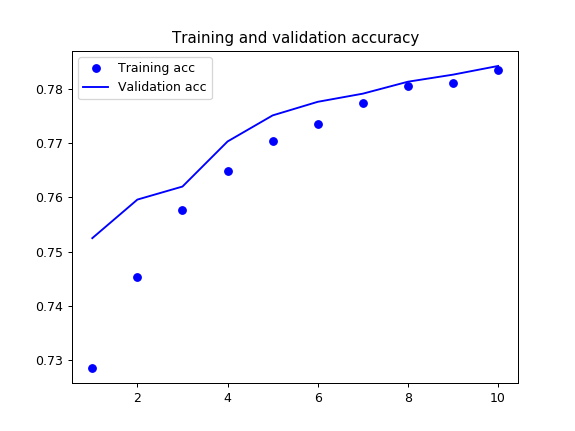

<IPython.core.display.Javascript object>


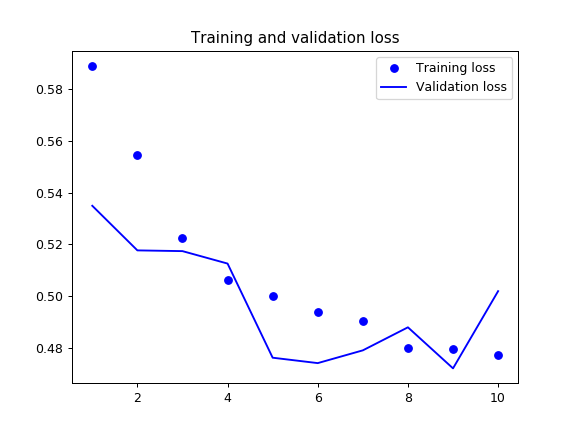

In [336]:
get_model_results(history)

acc = 0.73, loss = 0.57 
val_acc = 0.74, val_loss = 0.57 


<IPython.core.display.Javascript object>


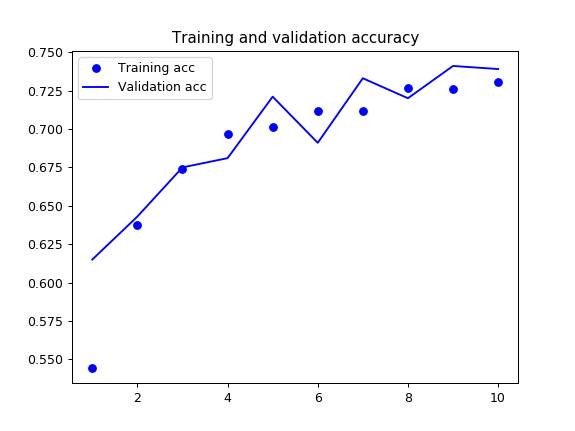

<IPython.core.display.Javascript object>


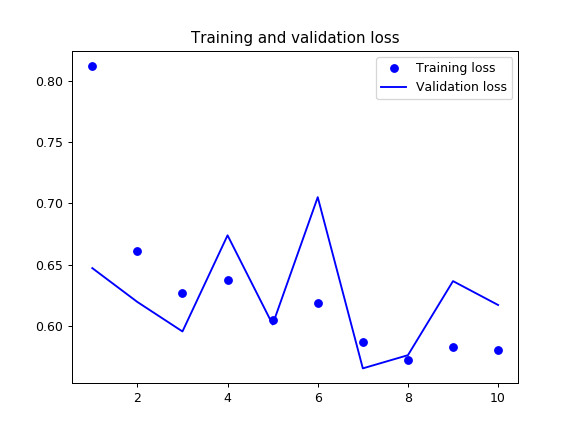

In [331]:
get_model_results(history)
# with a trining set of 10000, validation test 1000
#acc = 0.73, loss = 0.57 
#val_acc = 0.74, val_loss = 0.57 

In [ ]:
# This returns a tensor
#
inputs = Input(shape=(,32))

# a layer instance is callable on a tensor, and returns a tensor
#
x = TimeDistributed(Conv1D(16, (3), padding='same', kernel_initializer='Orthogonal'))(inputs)
x = Activation('elu')(x)
x = TimeDistributed(MaxPooling1D(pool_size=(2)))(x)
x = Dropout(0.2)(x)

x = TimeDistributed(Conv1D(32, (3), padding='same', kernel_initializer='Orthogonal'))(x)
x = Activation('elu')(x)
x = TimeDistributed(MaxPooling2D(pool_size=(2)))(x)
x = Dropout(0.2)(x)

x = TimeDistributed(Conv1D(64, (3), padding='same', kernel_initializer='Orthogonal'))(x)
x = Activation('elu')(x)
x = TimeDistributed(MaxPooling2D(pool_size=(2)))(x)

x = TimeDistributed(Flatten())(x) 

x = Conv1D(16, 3, padding='same', kernel_initializer='Orthogonal')(x)
x = Activation('elu')(x)
x = MaxPooling1D(pool_size=8)(x)

x = Bidirectional(LSTM(64, return_sequences=True, kernel_initializer='Orthogonal'))(x) 
x = Activation('elu')(x)
x = Bidirectional(LSTM(128, return_sequences=False, kernel_initializer='Orthogonal'))(x)
x = Activation('elu')(x)

predictions = Dense(1, activation='sigmoid')(x)`